In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
import numpy as np

train = "Data/readelf/train.npz"
val = "Data/readelf/val.npz"
test = "Data/readelf/test.npz"

# Load numpy array
training_dataset = np.load(train)
val_dataset = np.load(val)
test_dataset = np.load(test)

x_train = training_dataset['x']
y_train = training_dataset['y']

x_val = val_dataset['x']
y_val = val_dataset['y']

x_test = test_dataset['x']
y_test = test_dataset['y']

print("No. of seed files collected from: 20 (Split 12/4/4)")
print("Dataset collected limited to 100")
print("Ratio of seed file to mutated files = 1:100")

print("Training shape: ", x_train.shape, y_train.shape)
print("Validation shape: ", x_val.shape, x_val.shape)
print("Test shape: ", x_test.shape, y_test.shape)

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


No. of seed files collected from: 20 (Split 12/4/4)
Dataset collected limited to 100
Ratio of seed file to mutated files = 1:100
Training shape:  (1200, 3840, 64) (1200, 3840, 64)
Validation shape:  (400, 3840, 64) (400, 3840, 64)
Test shape:  (400, 3840, 64) (400, 3840, 64)


In [2]:
# Base model
model = Sequential()
model.add(LSTM(64, input_shape=(3840, 64), return_sequences=True))
model.add(Dense(64, activation='sigmoid'))
model.summary()
adam = Adam(lr=0.00005)
model.compile(optimizer=adam, loss='mean_absolute_error', metrics=['mae'])

# Fitting the model
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3840, 64)          33024     
_________________________________________________________________
dense_1 (Dense)              (None, 3840, 64)          4160      
Total params: 37,184
Trainable params: 37,184
Non-trainable params: 0
_________________________________________________________________
Train on 1200 samples, validate on 400 samples
Epoch 1/100
1200/1200 [==============================] - 223s 186ms/step - loss: 0.4973 - mean_absolute_error: 0.4973 - val_loss: 0.4965 - val_mean_absolute_error: 0.4965
Epoch 2/100
1200/1200 [==============================] - 224s 187ms/step - loss: 0.4916 - mean_absolute_error: 0.4916 - val_loss: 0.4921 - val_mean_absolute_error: 0.4921
Epoch 3/100
1200/1200 [==============================] - 223s 186ms/step - loss: 0.4835 - mean_absolute_error: 0.4835 - val_loss: 0.4854 - val_me

Epoch 45/100
1200/1200 [==============================] - 216s 180ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - val_loss: 0.0135 - val_mean_absolute_error: 0.0135
Epoch 46/100
1200/1200 [==============================] - 220s 183ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - val_loss: 0.0130 - val_mean_absolute_error: 0.0130
Epoch 47/100
1200/1200 [==============================] - 217s 180ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125
Epoch 48/100
1200/1200 [==============================] - 216s 180ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121
Epoch 49/100
1200/1200 [==============================] - 218s 181ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - val_loss: 0.0117 - val_mean_absolute_error: 0.0117
Epoch 50/100
1200/1200 [==============================] - 217s 181ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - val_loss: 0.0113 - 

1200/1200 [==============================] - 220s 183ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - val_loss: 0.0036 - val_mean_absolute_error: 0.0036
Epoch 93/100
1200/1200 [==============================] - 217s 180ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - val_loss: 0.0035 - val_mean_absolute_error: 0.0035
Epoch 94/100
1200/1200 [==============================] - 216s 180ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - val_loss: 0.0034 - val_mean_absolute_error: 0.0034
Epoch 95/100
1200/1200 [==============================] - 216s 180ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - val_loss: 0.0034 - val_mean_absolute_error: 0.0034
Epoch 96/100
1200/1200 [==============================] - 216s 180ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - val_loss: 0.0033 - val_mean_absolute_error: 0.0033
Epoch 97/100
1200/1200 [==============================] - 216s 180ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - val_loss: 0.0032 - val_mean_abso

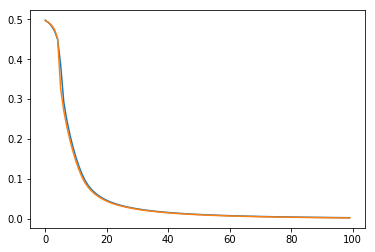

In [8]:
from matplotlib import pyplot
%matplotlib inline

# plot metrics
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])

In [9]:
test_loss = model.evaluate(x_test, y_test)

print("Test loss:", test_loss)

400/400 [==============================] - 15s 38ms/step
Test loss: [0.0031610911712050436, 0.003161091059446335]


In [5]:
predictions = model.predict(x_test)
print(predictions[0][0])
print(predictions[0][1])
print(predictions[0][2])
print(predictions[1][0])
print(predictions[1][1])
print(predictions[1][2])

[0.17865169 0.14213467 0.17927814 0.21294333 0.17830168 0.17682692
 0.19136672 0.21069252 0.17176564 0.18923765 0.18141824 0.18507546
 0.18156631 0.18416902 0.18459488 0.2271108  0.16668878 0.19885466
 0.18004946 0.22962838 0.14717181 0.18809927 0.17021605 0.19302149
 0.14770886 0.23624374 0.19731028 0.18297581 0.20148776 0.21629313
 0.17354184 0.19736001 0.12708025 0.20266901 0.17210636 0.19010529
 0.17664923 0.1725527  0.16351786 0.18916468 0.22901689 0.23535934
 0.1665835  0.21275888 0.19129752 0.14567927 0.20266904 0.20582058
 0.17682093 0.18910196 0.18339515 0.18070717 0.18371108 0.20092441
 0.15683034 0.2146696  0.15238148 0.2057826  0.15737134 0.16089387
 0.18354963 0.17092161 0.20576961 0.20182404]
[0.12605384 0.11788929 0.13580592 0.15022135 0.1452184  0.13851392
 0.1514621  0.15802509 0.13307025 0.14397487 0.13881922 0.14685374
 0.13953437 0.15294161 0.13820943 0.17446077 0.12621866 0.15810868
 0.14372829 0.18120311 0.11066235 0.14739238 0.11700618 0.147333
 0.11958216 0.1903

In [10]:
model.save("/home/isa/FYPJ/Model/model6_1.h5")

In [14]:
print(np.argmax(predictions[0][0]))

25
